In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

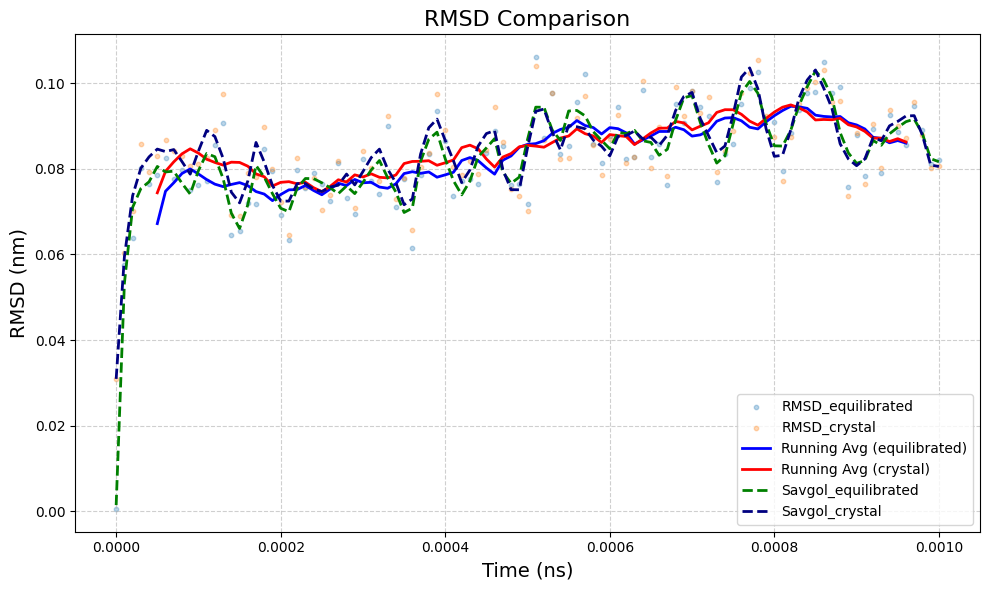

In [10]:

def read_xvg(file_path):
    time = []
    rmsd = []
    with open(file_path, "r") as f:
        for line in f:
            if line.startswith(("#", "@")):
                continue 
            parts = line.strip().split()
            if len(parts) >= 2:
                try:
                    t = float(parts[0])
                    r = float(parts[1])
                    time.append(t)
                    rmsd.append(r)
                except ValueError:
                    continue
    return pd.DataFrame({"Time_ps": time, "RMSD_nm": rmsd})


df1 = read_xvg("/Users/samirabaghbanbari/samira/code/data/rmsd.xvg")
df2 = read_xvg("/Users/samirabaghbanbari/samira/code/data/rmsd_xtal.xvg")

# Convert ps → ns 
df1["Time_ns"] = df1["Time_ps"] / 1000
df2["Time_ns"] = df2["Time_ps"] / 1000


# Running average
window_size = 10  
df1["RunningAvg"] = df1["RMSD_nm"].rolling(window=window_size, center=True).mean()
df2["RunningAvg"] = df2["RMSD_nm"].rolling(window=window_size, center=True).mean()


# Savitzky-Golay smoothing (LOESS)
polyorder = 5  
df1["Savgol"] = savgol_filter(df1["RMSD_nm"], window_size, polyorder)
df2["Savgol"] = savgol_filter(df2["RMSD_nm"], window_size, polyorder)


plt.figure(figsize=(10, 6))

# Raw scatter
plt.scatter(df1["Time_ns"], df1["RMSD_nm"], s=10, alpha=0.3, label="RMSD_equilibrated")
plt.scatter(df2["Time_ns"], df2["RMSD_nm"], s=10, alpha=0.3, label="RMSD_crystal")

# Running averages
plt.plot(df1["Time_ns"], df1["RunningAvg"], color="blue", linewidth=2, label="Running Avg (equilibrated)")
plt.plot(df2["Time_ns"], df2["RunningAvg"], color="red", linewidth=2, label="Running Avg (crystal)")

# Savitzky–Golay smooth
plt.plot(df1["Time_ns"], df1["Savgol"], color="green", linewidth=2, linestyle="--", label="Savgol_equilibrated")
plt.plot(df2["Time_ns"], df2["Savgol"], color="navy", linewidth=2, linestyle="--", label="Savgol_crystal")

plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("RMSD (nm)", fontsize=14)
plt.title("RMSD Comparison", fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
